# <span style="color:blue">Обучение без учителя Scikit-Learn

<b>Задание 1</b>
Импортируйте библиотеки pandas, numpy и matplotlib.<br>
<br>
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.<br>
<br>
Создайте датафреймы X и y из этих данных.<br>
<br>
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.<br>
<br>
Масштабируйте данные с помощью StandardScaler.
<br>
<br>
Постройте модель TSNE на тренировочный данных с параметрами:<br>
 n_components=2, learning_rate=250, random_state=42.
<br><br>
Постройте диаграмму рассеяния на этих данных.


In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [8]:
boston_data = load_boston()

In [9]:
x = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [10]:
x.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [114]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
y = pd.DataFrame(boston_data.target, columns=['price'])

In [12]:
y.head(10)

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [223]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 477 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 44.2 KB


In [90]:
scaler = StandardScaler()

In [224]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [225]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_train.columns)

In [226]:
X_train_scaled.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
5,-0.385519,-0.500320,-0.523527,-0.278089,-0.540021,0.162452,-1.926178,0.755292,-0.507797,-0.705154,0.575794,0.408971,-1.038833
6,-0.402695,-0.500320,-0.841560,-0.278089,-0.352880,-0.393595,-1.218030,1.022793,-0.507797,-1.084748,0.845343,0.444180,-0.626249
7,-0.404845,3.175545,-1.487791,-0.278089,-1.246051,0.094710,-1.175112,2.527219,-0.857485,-0.548496,-0.457477,0.444180,-0.941672
8,1.305053,-0.500320,1.033237,-0.278089,1.561057,-0.231297,1.124581,-0.889790,1.706891,1.578434,0.845343,-3.793837,1.970358
9,1.221694,-0.500320,1.033237,-0.278089,0.344643,0.756603,1.124581,-1.100587,1.706891,1.578434,0.845343,-1.934525,1.031130


In [93]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [94]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


In [176]:
#X_train_tsne

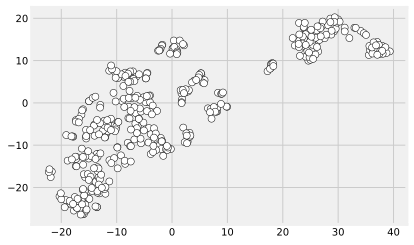

In [117]:
#plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.scatter(
   X_train_tsne[:, 0], X_train_tsne[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

<b>Задание 2</b>
<br>
<br>
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
<br>
<br>
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
<br>
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
<br>
Вычислите средние значения price и CRIM в разных кластерах.
<br>


In [18]:
from sklearn.cluster import KMeans

In [104]:
KMeans?

In [194]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [279]:
labels_train = kmeans.fit_predict(X_train_scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

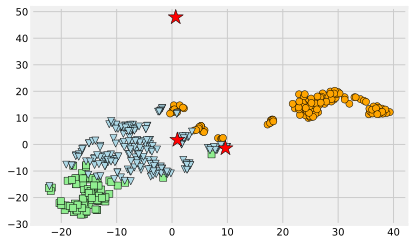

In [280]:
plt.scatter(
    X_train_tsne[labels_train == 0, 0], X_train_tsne[labels_train == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X_train_tsne[labels_train == 1, 0], X_train_tsne[labels_train == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.scatter(
    X_train_tsne[labels_train == 2, 0], X_train_tsne[labels_train == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.scatter(
    centers[:, 0], centers[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

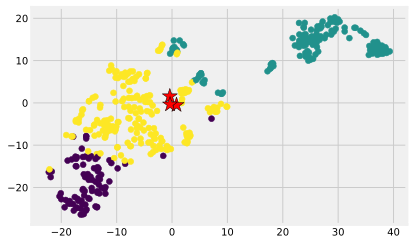

In [281]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

In [282]:
y_train.mean()

price    22.796535
dtype: float64

In [283]:
y_train[labels_train == 0].mean()

price    27.788372
dtype: float64

In [284]:
def mean_for_cluster(km_cluster, km_fit, colum, dataSet):
    for cluster_number in range(0, km_cluster.n_clusters):
        print(
            f'Кластер: {cluster_number},значение {colum}: {dataSet.loc[km_fit == cluster_number, colum].mean()}'
        )

In [288]:
mean_for_cluster(kmeans, labels_train, 'price', y_train)

Кластер: 0,значение price: 27.788372093023252
Кластер: 1,значение price: 16.165354330708666
Кластер: 2,значение price: 24.958115183246072


In [285]:
mean_for_cluster(kmeans, labels_train, 'CRIM', X_train)

Кластер: 0,значение CRIM: 0.07356558139534886
Кластер: 1,значение CRIM: 10.797028425196853
Кластер: 2,значение CRIM: 0.42166020942408367


In [286]:
mean_for_cluster(kmeans, labels_train, 'NOX', X_train)

Кластер: 0,значение NOX: 0.4258093023255814
Кластер: 1,значение NOX: 0.6911338582677164
Кластер: 2,значение NOX: 0.5257905759162298


<b>*Задание 3</b>
<br>
<br>
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
<br><br>
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
<br>


In [227]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [289]:
mean_for_cluster(kmeans, labels_test, 'price', y_test )

Кластер: 0,значение price: 34.55384615384615
Кластер: 1,значение price: 16.710526315789473
Кластер: 2,значение price: 21.71764705882353


In [271]:
mean_for_cluster(kmeans, labels_test, 'CRIM', X_test )

Кластер: 0,значение CRIM: 0.08308461538461537
Кластер: 1,значение CRIM: 9.419181842105264
Кластер: 2,значение CRIM: 0.22250117647058823


In [272]:
mean_for_cluster(kmeans, labels_test, 'NOX', X_test )

Кластер: 0,значение NOX: 0.432623076923077
Кластер: 1,значение NOX: 0.6633421052631578
Кластер: 2,значение NOX: 0.4906862745098041


In [275]:
y_test.loc[labels_test == 1,].mean()

price    16.710526
dtype: float64